### Compute structure factor for $N=100$

$$ I(k) = \sum_{i=0}^N \sum_{j=0}^N \left\langle \frac{\sin{k ||\vec{R}_i - \vec{R}_j||}}{k ||\vec{R}_i - \vec{R}_j||} \right\rangle$$

### Comparison with Guinier approximation
$$I(k) = (N + 1)^2 \left[1 - \frac{(k R_g)^2}{3} \right]$$

In [50]:
# Library for reading simulation data
import numpy as np
import matplotlib.pyplot as plt

# Parameters
b=3.0
N=100
T=100

# Coordinates arrays
x=np.zeros((T,N+1)); y=np.zeros((T,N+1)); z=np.zeros((T,N+1))

# Read simulation data
filename='simulation_FJC_b=%.1f_N=%d_T=%d.xyz'%(b,N,T)
with open(filename,'r') as f:
    for T in range(T):
        # First 2 lines unnecessary
        lines = f.readline()
        lines = f.readline()
        # Save coordinates and separate in x, y, z
        for i in range(N+1):
            lines = f.readline()
            coord = lines.split()
            x[T,i]=float(coord[1])
            y[T,i]=float(coord[2])
            z[T,i]=float(coord[3])

### Matrix computation

In [51]:
# Variables declaration
step = 0.01
k = np.arange(0, 0.2, step)     # k moment range
I = np.zeros(len(k))            # Intensity, I(k), function
Guinier = np.zeros(len(k))      # Guinier approximation
Rg2 = b**2 * N / 6              # Radius of gyration squared

for l in range(len(k)):
    kk = k[l]
    Guinier[l] = (N + 1)**2 * (1 - kk**2 * Rg2/3)
    for i in range(N + 1):
        for j in range(N + 1):
            if j != i:
                dist = np.sqrt((x[:T, i]-x[:T, j])**2 + (y[:T, i]-y[:T, j])**2 + (z[:T, i]-z[:T, j])**2)
                I[l] += np.mean(np.sinc(kk * dist))
            else:
                I[l] += 1

# I feel that the j != i could be changed to j > i and multiplied by 2 the term
# And the (else:) could be replaced just by defining I = np.ones(len(k)) and then I[l] *= (N + 1)
# as it accounts for the diagonal terms being equal to 1, and the number of diagonal terms is N + 1

### Plot

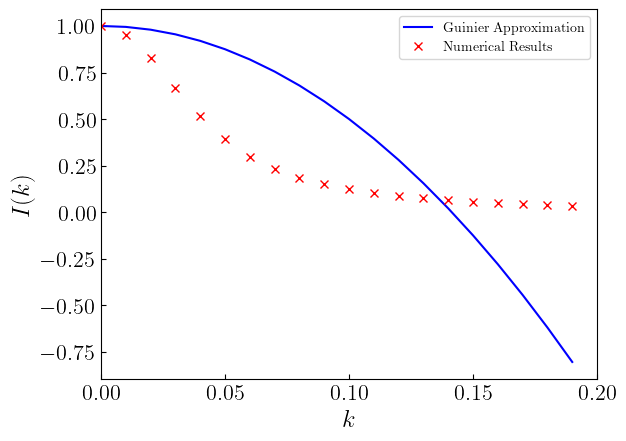

In [53]:
k = np.arange(0, 0.2, step)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure()
plt.plot(k, Guinier/(N+1)**2, 'b-', label=r'Guinier Approximation')
plt.plot(k, I/(N+1)**2, 'rx', label=r'Numerical Results')
plt.xlim(0, 0.2)
# plt.ylim(-1.1, 1.1)
plt.legend([r'Guinier Approximation', r'Numerical Results'])
plt.xlabel(r'$k$', fontsize=18)
plt.ylabel(r'$I(k)$', fontsize=18)
plt.tick_params(axis='y', which='major', labelsize=16, direction='in')
plt.tick_params(axis='x', which='major', labelsize=16, direction='in')
plt.show()